# Spectrograms

Download the sin_test.wav file. You should heare that the pitch changes throughout the file. Taking the Fourier transform of the whole file will give you a superposition of all of the pitches, but we often want to see the Fourier transform as a function of time.

In [1]:
from scipy.io import wavfile

In [2]:
rate, data = wavfile.read('sin_test.wav')

You should hear three distinct tones. Let's look at it in the time domain. We can see the time locations of the notes, but not the frequencies

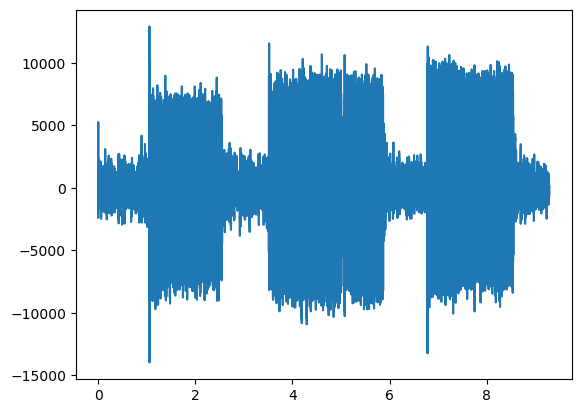

In [3]:
import numpy as np
import matplotlib.pyplot as plt
number_of_values = len(data)
time_per_sample = 1. / rate 
time_arr = np.arange(number_of_values) * time_per_sample
plt.plot(time_arr, data)

If we plot the Fourier transform we can see the different peaks at different times, but we can't identify which peak corresponds to which time. 

(0.0, 1000.0)

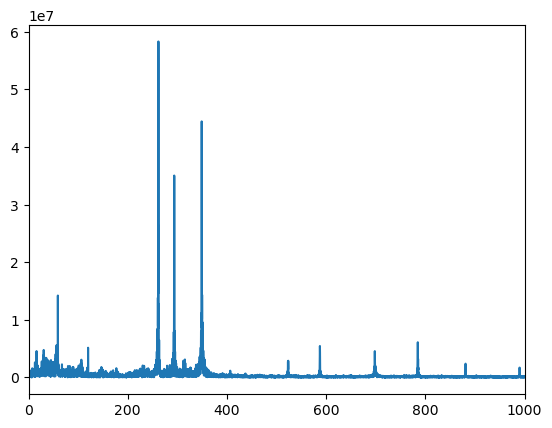

In [4]:
frequencies = np.arange(number_of_values) * rate / number_of_values # Hz
time_arr = np.arange(number_of_values) * time_per_sample
fourier_transform = np.fft.fft(data)
plt.plot(frequencies,np.abs(fourier_transform))
plt.xlim([0,1000])

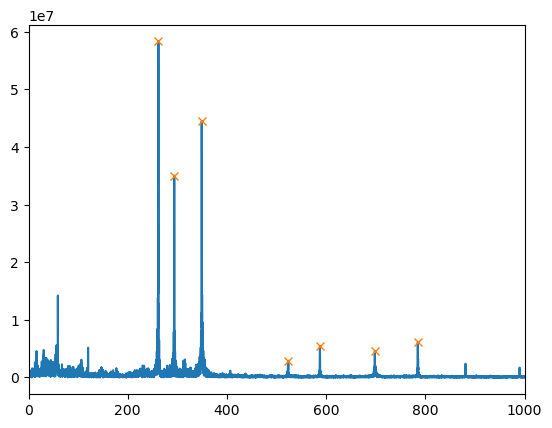

In [5]:
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

peaks, _ = find_peaks(np.abs(fourier_transform), height= 2700000, distance = 30* number_of_values/rate)
#height will set the minimum intensity for a peak
#distance will set the minimum separation between peaks
peaks = peaks[peaks > 200 * number_of_values/rate] #Makes the minimum frequency for a peak be 200 Hz
plt.plot(frequencies, np.abs(fourier_transform))
plt.plot(frequencies[peaks], np.abs(fourier_transform)[peaks], "x")
plt.xlim([0, 1000])
plt.show()

We can plot a spectrogram to look at the Fourier transform as a function of time

Text(0, 0.5, 'Frequency (Hz)')

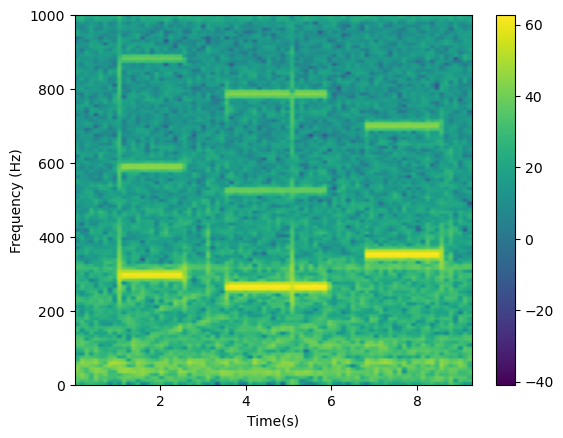

In [7]:
spectrum, freqs, t, im = plt.specgram(data, Fs = rate, NFFT = 1000)
plt.colorbar()
plt.ylim([0,1000])
plt.xlabel('Time(s)')
plt.ylabel('Frequency (Hz)')

From the above we can see how a spectrogram shows certain frequencies intensities over the duration of a signal. Note that the color represents how strong a certain frequency is.  In this example we can see that frequencies of around 300Hz, 600Hz, and 900Hz were active from time t=1 to approximately t=2.5. What other frequencies do you see?

You can adjust the resolution with the NFFT parameter and adjust the scope you're observing with the plt.xlim and plt.ylim parameters. Experiment with the NFFT parameter to get your desired range, 

Spectrograms have a trade-off between good time resolution and good frequency resolution. That means in these quantitative analyses you may want to take a certain time range and take the Fourier transform of that section. You can do this by selecting